### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [4]:
import pandas as pd
import numpy as np

In [5]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [26]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [68]:
df2[df2['nome_drs'] == 'Grande São Paulo']

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos_novos,obitos_novos
185,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-02,0,0
186,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-03,2,0
187,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-04,52,2
188,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-05,194,16
189,Arujá,3503901,Grande São Paulo,10.0,89744.0,10776.0,2020-06,30,1
...,...,...,...,...,...,...,...,...,...
3130,Vargem Grande Paulista,3556453,Grande São Paulo,10.0,52762.0,6337.0,2020-02,0,0
3131,Vargem Grande Paulista,3556453,Grande São Paulo,10.0,52762.0,6337.0,2020-03,2,1
3132,Vargem Grande Paulista,3556453,Grande São Paulo,10.0,52762.0,6337.0,2020-04,11,2
3133,Vargem Grande Paulista,3556453,Grande São Paulo,10.0,52762.0,6337.0,2020-05,50,2


In [69]:
df3 = df2.pivot_table(index='nome_drs',values='obitos_novos',aggfunc='sum')

In [70]:
df3 = df3.drop(index = "Grande São Paulo")

Text(0.5, 1.0, 'Total de óbitos por cidade')

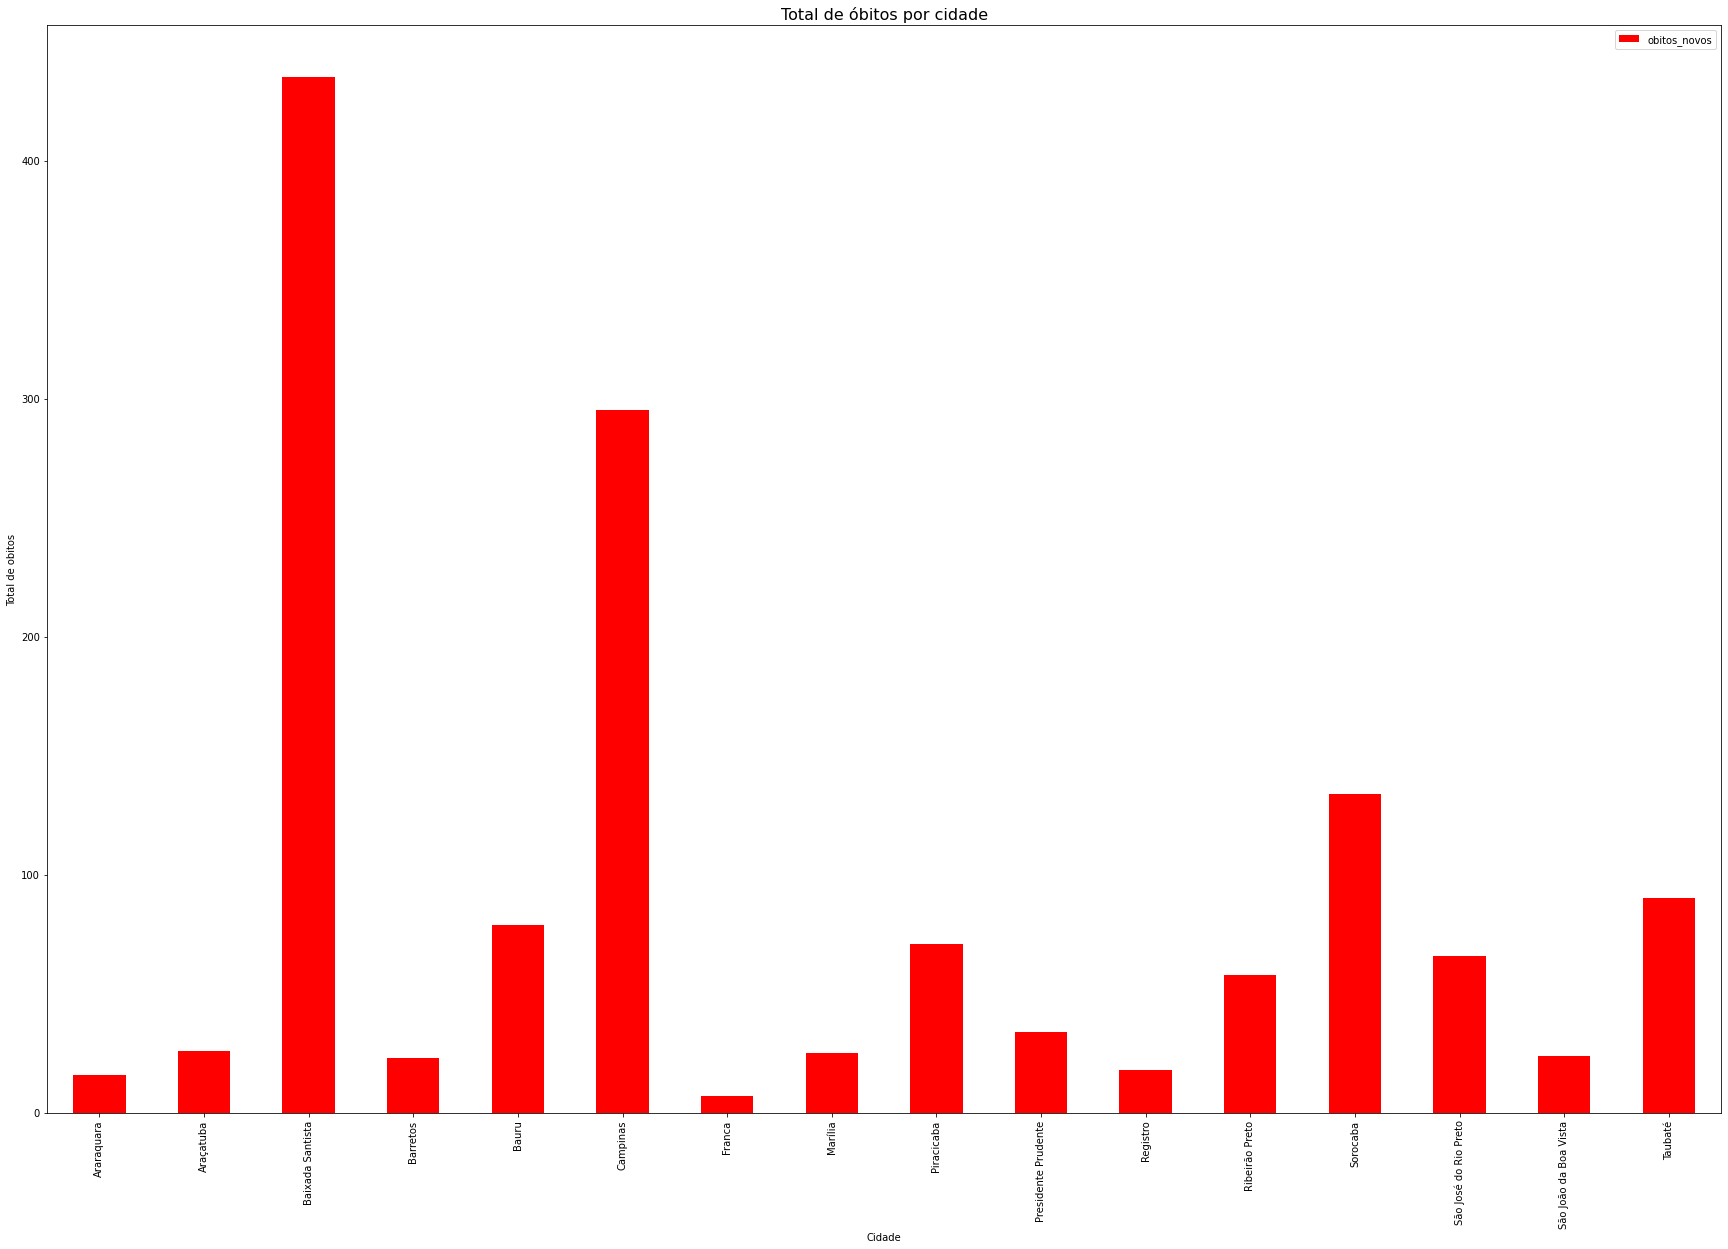

In [71]:
df_ob = df3.groupby('nome_drs').sum().plot(kind = 'bar', figsize = (30,20), stacked = True, color=['red','green'])
df_ob.set_xlabel('Cidade')
df_ob.set_ylabel('Total de obitos')
df_ob.set_title('Total de óbitos por cidade',fontdict={'fontsize':16})

**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [88]:
df_ob3 = df2[df2['ano_mes']== '2020-04'].groupby(by='nome_drs')['obitos_novos'].sum()
df_ob3 = df_ob3.sort_values()

df_ob3 = df_ob3.tail(3)


<AxesSubplot:title={'center':'Três cidades com maior óbitos'}, ylabel='nome_drs'>

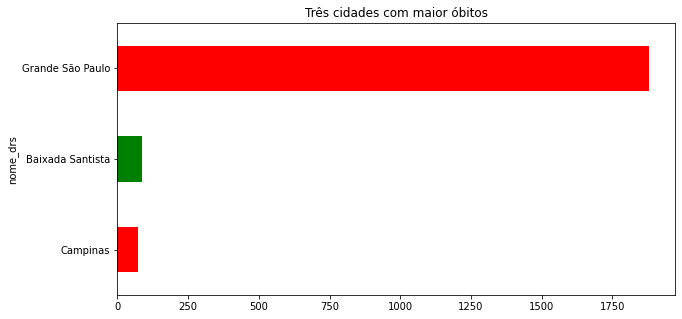

In [90]:
df_ob3.plot(figsize=(10,5),kind='barh',color=['red','green'],title='Três cidades com maior óbitos')


## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

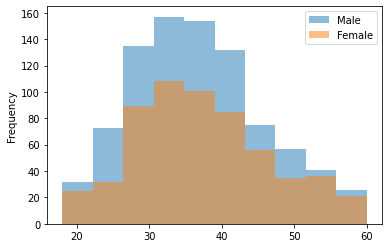

In [91]:
df_male = df1[df1['Gender']=='Male'].plot(kind='hist',y='Age',alpha=0.5,label='Male')
df_female = df1[df1['Gender']=='Female'].plot(kind='hist',y='Age',alpha=0.5,label='Female',ax=df_male)

**b)** Faça agora um boxplot das idades, por gênero.

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

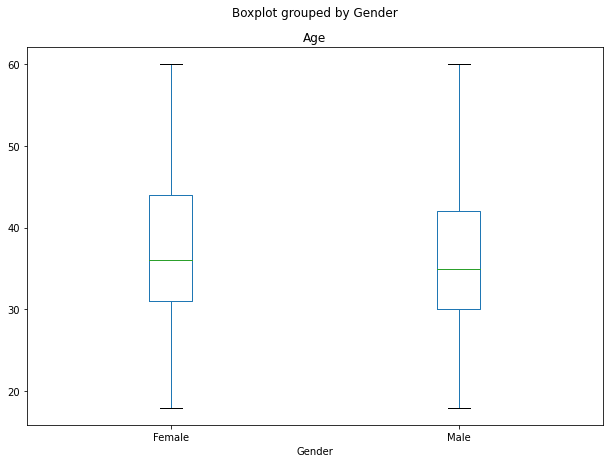

In [92]:
df1.boxplot(column='Age',by='Gender',grid=False,figsize=(10,7))